<a href="https://colab.research.google.com/github/itsrm2708/CRRT/blob/main/Final_CRRT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Define Helper Functions

In [2]:
def generate_matrix(n):
    # Create a nxn matrix with random values between 0 and 7
    matrix = np.random.randint(0, 7, (n, n))

    # Set the diagonal entries to 0
    np.fill_diagonal(matrix, 0)

    return matrix

def generate_ifn(value):
    # Generate a random membership degree between 0 and value/4
    # m = np.random.uniform(0, value/4)

    # # Ensure the non-membership degree satisfies m + n <= 1
    # n = np.random.uniform(0, 1 - m)
    ifns = {
        "0":(0.10,0.90),
        "1":(0.20,0.65),
        "2":(0.30,0.55),
        "3":(0.50,0.50),
        "4":(0.65,0.25),
        "5":(0.80,0.05),
        "6":(0.90,0.10)
    }
    return ifns[str(value)]


def dollar_operation(pair1, pair2):
    a1, b1 = pair1
    a2, b2 = pair2
    return [a1 * a2, b1 + b2 - b1 * b2]

def dollar_operation_with_power(pair1,power1, pair2,power2):
    a1, b1 = pair1
    a2, b2 = pair2
    return [(a1**power1) * (a2**power2), ((1-b1)**power1)*((1-b2)**power2)]


def m_operation(pair1, pair2):
    a1, b1 = pair1
    a2, b2 = pair2
    return (min(a1, a2), max(b1, b2))

def M_operation(pair1, pair2):
    a1, b1 = pair1
    a2, b2 = pair2
    return (max(a1, a2), min(b1, b2))


def dist(pair1, pair2):
    a1, b1 = pair1
    a2, b2 = pair2
    h1 = 1 - (a1 + b1)
    h2 = 1 - (a2 + b2)

    term1 = (abs(2*(a1 - a2) - (b1 - b2)) / 3) * (1 - (h1 + h2) / 2)
    term2 = (abs(2*(b1 - b2) - (a1 - a2)) / 3) * ((h1 + h2) / 2)

    return term1 + term2

Input no of experts and no of factors

In [3]:
k = int(input("Enter the number of Experts (k): "))
n = int(input("Enter the number of the Factors (n): "))
priority_parameter=float(input("Enter the Priority Parameter: "))

Enter the number of Experts (k): 20
Enter the number of the Factors (n): 18
Enter the Priority Parameter: 0.6


Experts Data to be filled in Matrices

In [4]:
matrices = [generate_matrix(n) for _ in range(k)]

    # Convert matrices to IFN matrices
ifn_matrices = []

for matrix in matrices:
    ifn_matrix = np.array([[generate_ifn(value) for value in row] for row in matrix])
    ifn_matrices.append(ifn_matrix)

# Write the matrices and IFN matrices to a file
with open("solution.txt", "w") as file:
    for i, (matrix, ifn_matrix) in enumerate(zip(matrices, ifn_matrices), 1):
        file.write(f"Matrix {i}:\n")
        for row in matrix:
            file.write(" ".join(map(str, row)) + "\n")
        file.write("\n")

        file.write(f"IFN Matrix {i}:\n")
        for row in ifn_matrix:
            file.write(" ".join([f"({m:.2f}, {n:.2f})" for m, n in row]) + "\n")
        file.write("\n")

print("Matrices and IFN matrices have been written to 'solution.txt'")

Matrices and IFN matrices have been written to 'solution.txt'


Calculate IFPIO  Matrix

In [5]:
IFPIO = np.zeros((n, n, 2))  # Initialize a nxn matrix with pairs
for i in range(n):
    for j in range(n):
        result = [1, 1]  # Initialize with neutral element for the $ operation
        for ifn_matrix in ifn_matrices:
            result = [result[0] * (ifn_matrix[i][j][0]**(1/k)),result[1]*((1-ifn_matrix[i][j][1])**(1/k))]
        IFPIO[i][j] = [result[0],1-result[1]]  # Take the average

# Append the IFPIO matrix to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("IFPIO Matrix (Intuitionistic Fuzzy Positive Ideal Opinion Matrix):\n")
    for row in IFPIO:
        file.write(" ".join([f"({m:10.5f}, {n:10.5f})" for m, n in row]) + "\n")
    file.write("\n")

print("IFPIO matrix has been appended to 'solution.txt'")


IFPIO matrix has been appended to 'solution.txt'


Calculate IFNIO Matrice

In [6]:
# Compute the IFNIO matrix by swapping the pairs from the IFPIO matrix
IFNIO = np.array([[(b, a) for a, b in row] for row in IFPIO])

# Append the IFNIO matrix to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("IFNIO Matrix (Intuitionistic Fuzzy Negative Ideal Opinion Matrix):\n")
    for row in IFNIO:
        file.write(" ".join([f"({m:10.5f}, {n:10.5f})" for m, n in row]) + "\n")
    file.write("\n")

print("IFNIO matrix has been appended to 'solution.txt'")


IFNIO matrix has been appended to 'solution.txt'


Calculate IFLNIO Matrix

In [7]:
# Compute the IFLNIO matrix using the m operation
IFLNIO = np.zeros((n, n, 2))  # Initialize a 5x5 matrix with pairs

for i in range(n):
    for j in range(n):
        result = ifn_matrices[0][i][j]  # Start with the first IFN matrix
        for p in range(1, len(ifn_matrices)):
            result = m_operation(result, ifn_matrices[p][i][j])
        IFLNIO[i][j] = result

# Append the IFLNIO matrix to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("IFLNIO Matrix (Intuitionistic Fuzzy Left Negative Ideal Opinion Matrix):\n")
    for row in IFLNIO:
        file.write(" ".join([f"({m:10.5f}, {n:10.5f})" for m, n in row]) + "\n")
    file.write("\n")

print("IFLNIO matrix has been appended to 'solution.txt'")


IFLNIO matrix has been appended to 'solution.txt'


Calculate IFRNIO Matrix

In [8]:
# Compute the IFRNIO matrix using the M operation
IFRNIO = np.zeros((n, n, 2))  # Initialize a 5x5 matrix with pairs

for i in range(n):
    for j in range(n):
        result = ifn_matrices[0][i][j]  # Start with the first IFN matrix
        for p in range(1, len(ifn_matrices)):
            result = M_operation(result, ifn_matrices[p][i][j])
        IFRNIO[i][j] = result

# Append the IFRNIO matrix to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("IFRNIO Matrix (Intuitionistic Fuzzy Right Negative Ideal Opinion Matrix):\n")
    for row in IFRNIO:
        file.write(" ".join([f"({m:10.5f}, {n:10.5f})" for m, n in row]) + "\n")
    file.write("\n")

print("IFRNIO matrix has been appended to 'solution.txt'")

IFRNIO matrix has been appended to 'solution.txt'


Defined List of names of matrix

In [9]:
matrices_list = [IFPIO, IFNIO, IFLNIO, IFRNIO]
matrices_names = ["IFPIO", "IFNIO", "IFLNIO", "IFRNIO"]

# List of the five IFN matrices
ifn_matrices_list = ifn_matrices
ifn_matrices_names = [f"IFN{p+1}" for p in range(k)]
expert_matrices_names = [f"Expert_{p+1}" for p in range(k)]
# Dictionary to store the distance matrices
distance_matrices_dict = {}

Calculate distance matrix for all the possible combinations

In [10]:
# Compute the distance matrices for all n*k combinations
with open("solution.txt", "a") as file:
    for i, matrix in enumerate(matrices_list):
          for j, ifn_matrix in enumerate(ifn_matrices_list):
              distance_matrix = np.zeros((n, n))
              for x in range(n):
                  for y in range(n):
                      distance_matrix[x][y] = dist(matrix[x][y], ifn_matrix[x][y])

              # Store the distance matrix in the dictionary
              key = f"{matrices_names[i]}_to_{ifn_matrices_names[j]}"

              distance_matrices_dict[key] = distance_matrix

              # Append the distance matrix to the solution.txt file
              file.write(f"Distance Matrix between {matrices_names[i]} and {ifn_matrices_names[j]}:\n")
              for row in distance_matrix:
                  file.write(" ".join([f"{value:10.5f}" for value in row]) + "\n")
              file.write("\n")

print("All distance matrices have been computed and stored.")

All distance matrices have been computed and stored.


Initialize DistanceMatrix

In [11]:
DistanceMatrix = np.zeros((k, 4))

Calculate Values for DistanceMatrix

In [12]:
# Compute the values for DistanceMatrix
for i, ifn_name in enumerate(ifn_matrices_names):
    for j, matrix_name in enumerate(matrices_names):
        key = f"{matrix_name}_to_{ifn_name}"
        DistanceMatrix[i][j] = np.sum(distance_matrices_dict[key])

# Append the DistanceMatrix to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("DistanceMatrix (Summation of Distance Matrices):\n")

    # Top boundary
    file.write("+" + "-" * (len(matrices_names) * 12 + 7) + "+\n")

    # Column names with vertical boundaries
    file.write("|       " + " | ".join(matrices_names) + " |\n")

    # Separator line
    file.write("|" + "-" * (len(matrices_names) * 12 + 7) + "|\n")

    # Matrix rows with vertical boundaries
    for i, row in enumerate(DistanceMatrix):
        file.write("| " + expert_matrices_names[i] + " " + " | ".join([f"{value:10.5f}" for value in row]) + " |\n")

    # Bottom boundary
    file.write("+" + "-" * (len(matrices_names) * 12 + 7) + "+\n\n")

print("DistanceMatrix with a boundary has been appended to 'solution.txt'")

DistanceMatrix with a boundary has been appended to 'solution.txt'


Calculate Closeness Coefficient

In [13]:
closeness_coefficients = []

In [14]:
for i in range(k):  # For each IFN
        numerator = sum(DistanceMatrix[i, j] for j in [1, 2, 3])  # Sum values from IFNIO, IFLNIO, and IFRNIO columns
        denominator = sum(DistanceMatrix[i])  # Sum values from all four columns
        coefficient = numerator / denominator if denominator != 0 else 0  # Handle potential division by zero
        closeness_coefficients.append(coefficient)

# Append the closeness coefficients to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("Closeness Coefficients for each Expert:\n")
    for i, coefficient in enumerate(closeness_coefficients):
        file.write(f"{expert_matrices_names[i]}: {coefficient:10.5f}\n")
    file.write("\n")

print("Closeness coefficients have been computed and appended to 'solution.txt'")

Closeness coefficients have been computed and appended to 'solution.txt'


Calculate **μ** [degree of membership] , **ν** [degree of non-membership] , **π** [degree of hesitation]



In [15]:
mu_values = []
nu_values = []
hesitation_values = []

# Compute the values for each IFN
for i in range(k):
    # Compute mu value
    denominator = DistanceMatrix[i, 0] + DistanceMatrix[i, 1]
    mu = DistanceMatrix[i, 1] / denominator if denominator != 0 else 0
    mu_values.append(mu)

    # Compute nu value
    nu = 1 - closeness_coefficients[i]
    nu_values.append(nu)

    # Compute hesitation value
    hesitation = 1 - (mu + nu)
    hesitation_values.append(hesitation)

# Append the table to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("Table of  μ, ν, and π values for each Expert:\n")
    file.write("IFN     |      μ     |   ν   | π\n")
    file.write("-" * 50 + "\n")
    for i in range(k):
        file.write(f"{expert_matrices_names[i]:<8}| {mu_values[i]:10.5f} | {nu_values[i]:10.5f} | {hesitation_values[i]:10.5f}\n")
    file.write("\n")

print("Table of  μ, ν, and π values has been appended to 'solution.txt'")

Table of  μ, ν, and π values has been appended to 'solution.txt'


Weight For Each Expert

In [16]:
# Compute the weights W for each IFN
weights = []
for i in range(k):
    mu = mu_values[i]
    nu = nu_values[i]
    hesitation = hesitation_values[i]
    weight = mu + hesitation * (mu / (mu + nu) if mu + nu != 0 else 0)  # Handle potential division by zero
    weights.append(weight)

# Compute the normalized weights NW
total_weight = sum(weights)
normalized_weights = [weight / total_weight if total_weight != 0 else 0 for weight in weights]  # Handle potential division by zero

# Append the weights and normalized weights to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("Weights (W) and Normalized Weights (NW) for each Expert:\n")
    file.write("Expert     |     W      |     NW\n")
    file.write("-" * 40 + "\n")
    for i in range(k):
        file.write(f"{expert_matrices_names[i] :<8}| {weights[i]:10.5f} | {normalized_weights[i]:10.5f}\n")
    file.write("\n")

print("Weights and normalized weights have been computed and appended to 'solution.txt'")

Weights and normalized weights have been computed and appended to 'solution.txt'


### Inter-Relationship mining between factors

Defining Function for getting weighted IFN matrix

In [17]:
def multiply_matrix_and_weight(matrix, weight):
    """
    Multiplies each element of the matrix (each IFN) by the weight.
    Since the matrix contains tuples, we'll handle the multiplication element-wise for the tuples.
    """
    weighted_matrix = []
    for row in matrix:
        weighted_row = [(weight * element[0], weight * element[1]) for element in row]
        weighted_matrix.append(weighted_row)
    return weighted_matrix

Get the weighted IFN matrices

In [18]:
expert_weighted_ifn_matrices = [multiply_matrix_and_weight(matrix, weight) for matrix, weight in zip(ifn_matrices, normalized_weights)]

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nExpert Weighted IFN Matrices:\n")
    for i, matrix in enumerate(expert_weighted_ifn_matrices):
        file.write(f"\nMatric {i + 1}:\n")
        for row in matrix:
            # Writing each row in a readable format
            row_str = ', '.join([f"({x:.2f}, {y:.2f})" for x, y in row])
            file.write(f"{row_str}\n")

print("Expert weighted IFN matrices have been written to 'solution.txt'.")


Expert weighted IFN matrices have been written to 'solution.txt'.


Generate Intuitionistic Fuzzy Weight Aggregated Inter-influence Matrix (IFWAIIM)

In [19]:
def aggregate_with_dollar_operation(matrices,weights):
    """
    Aggregate multiple IFN matrices using the '$' operation.
    """
    aggregated_matrix = np.zeros((n,n,2))
    for i in range(n):
      for j in range(n):
        e = 0;
        result = [1, 1]  # Initialize with neutral element for the $ operation
        for ifn_matrix in ifn_matrices:
            result = [result[0] * (ifn_matrix[i][j][0]**(weights[e])),result[1]*((1-ifn_matrix[i][j][1])**weights[e])]
            e = e+1
        aggregated_matrix[i][j] = [result[0],1-result[1]]  # Take the average
    return aggregated_matrix


# Calculate the IFWAIIM
ifwaiim = aggregate_with_dollar_operation(ifn_matrices,normalized_weights)

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nIntuitionistic Fuzzy Weight Aggregated Inter-influence Matrix (IFWAIIM):\n")
    for row in ifwaiim:
        # Writing each row in a readable format
        row_str = ', '.join([f"({x:.2f}, {y:.2f})" for x, y in row])
        file.write(f"{row_str}\n")

print("IFWAIIM has been written to 'solution.txt'.")


IFWAIIM has been written to 'solution.txt'.


Generate C-IIM (Crisp Inter-Infuence
Matrix)

In [20]:
def transform_to_crisp_value(ifn):
    """
    Transform an IFN to a crisp value using the formula (mu - nu + 1) / 2.
    """
    mu, nu = ifn
    return (mu - nu + 1) / 2

def create_ciim(ifwaiim):
    """
    Create the Crisp Inter-Influence Matrix (CIIM) by transforming the IFWAIIM.
    """
    ciim = []
    for row in ifwaiim:
        crisp_row = [transform_to_crisp_value(ifn) for ifn in row]
        ciim.append(crisp_row)
    return ciim


# Create the CIIM from the IFWAIIM
ciim = create_ciim(ifwaiim)

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nCrisp Inter-Influence Matrix (CIIM):\n")
    for row in ciim:
        # Writing each row in a readable format
        row_str = ', '.join([f"{value:.2f}" for value in row])
        file.write(f"{row_str}\n")

print("CIIM has been written to 'solution.txt'.")

CIIM has been written to 'solution.txt'.


Determine the MAXSUM(m*)

In [21]:
# Step 1: Find the maximum in each row and sum these maximums
m1 = np.sum(np.max(ciim, axis=1))

# Step 2: Find the maximum in each column and sum these maximums
m2 = np.sum(np.max(ciim, axis=0))

# Step 5: Determine the maximum between 'max_row_sum' and 'max_col_sum'
max_value_in_ciim = max(m1, m2)

    # Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\n========================================\n")  # For emphasis and separation
    file.write(f"Maximum Value in CIIM: {max_value_in_ciim:.2f}\n")
    file.write("========================================\n")  # For emphasis and separation

print("Maximum value in CIIM has been written to 'solution.txt'.")

Maximum value in CIIM has been written to 'solution.txt'.


Generate N-IIM (Normalized Inter-Infuence
Matrix)

In [22]:
n_iim = [[value / max_value_in_ciim for value in row] for row in ciim]

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nNormalized Inter-Influence Matrix (N-IIM):\n")
    for row in n_iim:
        # Writing each row in a readable format
        row_str = ', '.join([f"{value:.2f}" for value in row])
        file.write(f"{row_str}\n")

print("N-IIM has been written to 'solution.txt'.")

N-IIM has been written to 'solution.txt'.


Generate T-IIM (Total Inter-Infuence
Matrix)

In [23]:
# Generate an identity matrix of size n x n
identity_matrix = np.identity(n)

# Calculate (I - n_iim)
subtract_matrix = identity_matrix - n_iim
try:
    # Calculate the inverse of (I - n_iim)
    inverse_matrix = np.linalg.inv(subtract_matrix)
except np.linalg.LinAlgError:
    # Handle the case where the matrix is not invertible
    print("Error: (I - n_iim) matrix is not invertible.")
    exit()

with open('solution.txt', 'a') as file:  # 'a' stands for append mode
        file.write("\nInverse of (I - n_iim):\n")
        for row in inverse_matrix:
            row_str = ', '.join([f"{value:.2f}" for value in row])
            file.write(f"[{row_str}]\n")

# Calculate T-IIM: n_iim * (I - n_iim)^-1
t_iim =n_iim @ inverse_matrix

# Writing to the solution file
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\nTotal Inter-Influence Matrix (T-IIM):\n")
    for row in t_iim:
        # Writing each row in a readable format
        row_str = ', '.join([f"{value:.2f}" for value in row])
        file.write(f"{row_str}\n")

print("T-IIM has been written to 'solution.txt'.")




T-IIM has been written to 'solution.txt'.


 Calculating  **α** , **minimum and maximum**



In [24]:
# Calculate the average of all elements in the matrix.
α = np.mean(t_iim)
# Find the maximum and minimum values in the matrix
max_t_iim = np.max(t_iim)
min_t_iim = np.min(t_iim)


with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\n========================================\n")  # For emphasis and separation
    file.write(f"Threshold : {α:.2f}\n")
    file.write("========================================\n")  # For emphasis and separation
    print("Threshold α has been written to 'solution.txt'.")
    file.write("\n========================================\n")  # For emphasis and separation
    file.write(f"Minimum : {min_t_iim:.2f}\n")
    file.write("========================================\n")  # For emphasis and separation
    print("Minimum value has been written to 'solution.txt'.")
    file.write("\n========================================\n")  # For emphasis and separation
    file.write(f"Maximum : {max_t_iim:.2f}\n")
    file.write("========================================\n")  # For emphasis and separation
    print("Maximum value has been written to 'solution.txt'.")




Threshold α has been written to 'solution.txt'.
Minimum value has been written to 'solution.txt'.
Maximum value has been written to 'solution.txt'.


Calculating Normalized Total Inter-Influence Matrix (N-TIIM)

In [25]:
# Calculate N-TIIM based on the formula provided
n_tiim = (t_iim - α) / (max_t_iim - min_t_iim)
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\n Normalized Total Inter-Influence Matrix (N-TIIM):\n")
    for row in n_tiim:
        row_str = ', '.join([f"{value:.2f}" for value in row])
        file.write(f"{row_str}\n")
    print(" Normalized Total Inter-Influence Matrix (N-TIIM) has been written to 'solution.txt'")


 Normalized Total Inter-Influence Matrix (N-TIIM) has been written to 'solution.txt'


Generating Degree of influence and Degree of dependence

In [26]:
# Initialize lists to store the degrees of influence and dependence
degrees_of_influence = []
degrees_of_dependence = []

# Calculate the degree of influence for each row
for row in n_tiim:
    positive_values = row[row > 0]  # filter for positive values
    degree_of_influence = np.sum(positive_values)
    degrees_of_influence.append(degree_of_influence)

# Calculate the degree of dependence for each column
for col in n_tiim.T:  # .T is used to transpose the matrix, making the columns accessible as rows
    positive_values = col[col > 0]  # filter for positive values
    degree_of_dependence = np.sum(positive_values)
    degrees_of_dependence.append(degree_of_dependence)

# Convert the results to string representations
dinf_str = ' '.join('{:0.2f}'.format(dinf) for dinf in degrees_of_influence)
ddep_str = ' '.join('{:0.2f}'.format(ddep) for ddep in degrees_of_dependence)

# Write the results to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("\nDegrees of Influence (Dinf) for each row:\n")
    file.write(dinf_str)
    file.write("\n\nDegrees of Dependence (Ddep) for each column:\n")
    file.write(ddep_str)
    file.write("\n")

# At this point, the degrees of influence and dependence have been appended to "solution.txt".


Inter-Reachability Matrix

In [27]:
# Create a new matrix based on the condition.
IRM = np.where(n_tiim < 0, 0, 1)
with open('solution.txt', 'a') as file:  # 'a' stands for append mode
    file.write("\Inter-Reachability Matrix:\n")
    for row in IRM:
      row_str = ', '.join([f"{value:.2f}" for value in row])
      file.write(f"{row_str}\n")
    print("Inter-Reachability Matrix has been written to 'solution.txt'")


Inter-Reachability Matrix has been written to 'solution.txt'


Number of influenced factors and number of influent factors

In [28]:
# Initialize lists to store the degrees of influence and dependence
numbers_of_influenced = []
numbers_of_influent = []

# Calculate the degree of influence for each row
for row in IRM:
    number_of_influenced = np.sum(row)
    numbers_of_influenced.append(number_of_influenced)

# Calculate the degree of dependence for each column
for col in IRM.T:  # .T is used to transpose the matrix, making the columns accessible as rows
    number_of_influent = np.sum(col)
    numbers_of_influent.append(number_of_influent)

# Convert the results to string representations
ninfluenced_str = ' '.join('{:0.2f}'.format(ninfluenced) for ninfluenced in numbers_of_influenced)
ninfluent_str = ' '.join('{:0.2f}'.format(ninfluent) for ninfluent in numbers_of_influent)

# Write the results to the solution.txt file
with open("solution.txt", "a") as file:
    file.write("\n number of Influenced (#influenced) for each row:\n")
    file.write(ninfluenced_str)
    file.write("\n number of Influent (#influent) for each column:\n")
    file.write(ninfluent_str)
    file.write("\n")

Cause-effect identification of the factors

In [29]:
# Calculating the new metrics
connectivity_measure = [influenced + influent for influenced, influent in zip(numbers_of_influenced, numbers_of_influent)]
measure_of_influence = [influenced - influent for influenced, influent in zip(numbers_of_influenced, numbers_of_influent)]
degree_of_prominence = [inf + dep for inf, dep in zip(degrees_of_influence, degrees_of_dependence)]
degree_of_relation = [inf - dep for inf, dep in zip(degrees_of_influence, degrees_of_dependence)]
CI = [(priority_parameter*moi/n)+(1-priority_parameter)*dor for moi,dor in zip(measure_of_influence,degree_of_relation)]
CI_2 = [(priority_parameter*cm/n)+(1-priority_parameter)*dop for cm,dop in zip(connectivity_measure,degree_of_prominence)]
Type = [ "Cause" if ci>0 else "Effect" for ci in CI]
# Creating a DataFrame from the lists
data = {
    'Factors': [f'Factor{i+1}' for i in range(len(degrees_of_influence))],
    '#influenced': numbers_of_influenced,
    '#influent': numbers_of_influent,
    '#influenced + #influent': connectivity_measure,
    '#influenced - #influent': measure_of_influence,
    "D'inf": degrees_of_influence,
    "D'dep": degrees_of_dependence,
    "D'inf + D'dep": degree_of_prominence,
    "D'inf - D'dep": degree_of_relation,
    "CI":CI,
    "Type":Type
}

df = pd.DataFrame(data)

# Writing the DataFrame to the solution.txt file with a tabular representation
with open("solution.txt", "a") as file:
    file.write("\n")  # Add a newline for separation from previous content
    file.write("Table of Metrics:\n")
    file.write(df.to_string(index=False))  # DataFrame to formatted string, without row indices
    file.write("\n\n")  # Add newlines for separation from subsequent content


CR-Graph (Cause Effect Partition)

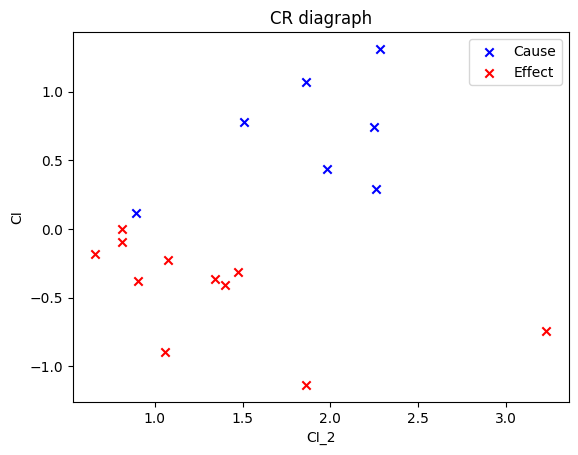

In [30]:
# Points for "Cause" (Y > 0)
cause_x = [CI_2[i] for i in range(len(CI)) if CI[i] > 0]
cause_y = [CI[i] for i in range(len(CI)) if CI[i] > 0]
plt.scatter(cause_x, cause_y, c='blue', marker='x', label='Cause')

# Points for "Effect" (Y < 0)
effect_x = [CI_2[i] for i in range(len(CI)) if CI[i] < 0]
effect_y = [CI[i] for i in range(len(CI)) if CI[i] < 0]
plt.scatter(effect_x, effect_y, c='red', marker='x', label='Effect')

# Adding labels for axes
plt.xlabel('CI_2')
plt.ylabel('CI')

# Adding a title to the graph
plt.title('CR diagraph')

# Adding a legend to the graph
plt.legend()

# Show the plot
plt.show()
